In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the datasets
import numpy as np
import pandas as pd

file_name = "/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Electronics_v1_00.tsv"

# Use on_bad_lines parameter to skip problematic rows
df = pd.read_csv(file_name, 
                 sep='\t', 
                 on_bad_lines='skip')


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 353.7+ MB


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [4]:
# Load the twitter data

twitter_df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1')
twitter_df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [5]:
twitter_df.info()
twitter_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [60]:
# Convert review_date to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])
df['year'] = df['review_date'].dt.year


In [7]:
# List of keywords related to electronics
company_keywords = [
    'Apple', 'Samsung', 'Sony', 'LG', 'Microsoft', 'Amazon'
]


In [8]:
# Example: Pre-filter tweets with more than 5 words (optional)
twitter_df = twitter_df[twitter_df['text'].str.split().str.len() > 5]

# Apply filtering in chunks (if dataset is large)
chunk_size = 100000  # Adjust based on memory capacity
filtered_chunks = []

for start in range(0, len(twitter_df), chunk_size):
    chunk = twitter_df.iloc[start:start + chunk_size]
    filtered_chunk = chunk[chunk['text'].str.contains('|'.join(company_keywords), case=False, na=False)]
    filtered_chunks.append(filtered_chunk)

# Combine all filtered chunks
filtered_tweets = pd.concat(filtered_chunks, ignore_index=True)
filtered_tweets.head()

,target,id,date,flag,user,text
0,0,1467825084,Mon Apr 06 22:23:30 PDT 2009,NO_QUERY,PresidentSnow,"@Lt_Algonquin agreed, I saw the failwhale alll..."
1,0,1467891826,Mon Apr 06 22:41:07 PDT 2009,NO_QUERY,elamparuthi,amazon s3 plugin not worked in my website . it...
2,0,1467918560,Mon Apr 06 22:48:32 PDT 2009,NO_QUERY,jkenneth,"@treesahquiche okay, about the applepears, I'v..."
3,0,1467926444,Mon Apr 06 22:50:48 PDT 2009,NO_QUERY,ElliotTucker,Nasty budget due and my iphone is being sent t...
4,0,1467979881,Mon Apr 06 23:05:51 PDT 2009,NO_QUERY,joshray,@redvinylgirl my mom has it. I wish you the be...


In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to process a batch of data
def process_batch(batch):
    batch['sentiment_score'] = batch['review_body'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
    return batch

# Process data in chunks
chunk_size = 100000  # Adjust based on memory constraints
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_batch(chunk)
    processed_chunks.append(processed_chunk)

# Combine processed chunks back into a single DataFrame
df = pd.concat(processed_chunks)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,company,yearmonth,sentiment_score
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31,Other,2015-08,0.0000
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31,Other,2015-08,0.0000
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31,Other,2015-08,0.0000
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31,Apple,2015-08,0.0000
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,Other,2015-08,0.6597


In [40]:
# Filter based on the year 2009 for amazon
amazon_2009 = df[df['review_date'].dt.year == 2009]
# Group by product_title and month, then calculate average sentiment score
amazon_monthly_sentiment = amazon_2009.groupby(
    [pd.Grouper(key='review_date', freq='ME'), 'product_title']
)['sentiment_score'].mean().reset_index()

print(amazon_monthly_sentiment.head())


  review_date                                      product_title  \
0  2009-01-31  (100) 7" Record Outer Sleeves - Polyethylene -...   
1  2009-01-31  (2 Pack) HP Q2613A Compatible Black Toner Cart...   
2  2009-01-31  (2 in 1 Combo) Slim Small Carrying case Hard D...   
3  2009-01-31  (5 Items Combo) Samsung Mp3 Music Bundle Usb D...   
4  2009-01-31  (6 Colors available) Travel Package for Amazon...   

   sentiment_score  
0           0.7835  
1          -0.6016  
2           0.5881  
3          -0.2350  
4           0.6217  


In [41]:
# Convert date to datetime format
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
# Apply VADER to calculate sentiment scores for tweet text
def process_sentiment_batch(batch):
    batch['sentiment_score'] = batch['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
    return batch

# Process data in chunks
chunk_size = 100000  # Adjust based on memory constraints
chunks = [filtered_tweets[i:i+chunk_size] for i in range(0, len(filtered_tweets), chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_sentiment_batch(chunk)
    processed_chunks.append(processed_chunk)

# Combine processed chunks back into a single DataFrame
twitter_filtered_df = pd.concat(processed_chunks, ignore_index=True)


In [42]:
twitter_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9278 entries, 0 to 9277
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           9278 non-null   int64  
 1   id               9278 non-null   int64  
 2   date             9278 non-null   object 
 3   flag             9278 non-null   object 
 4   user             9278 non-null   object 
 5   text             9278 non-null   object 
 6   sentiment_score  9278 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 507.5+ KB


In [43]:
# Group by month and calculate average sentiment score
twitter_filtered_df['date'] = pd.to_datetime(twitter_filtered_df['date'])
twitter_monthly_sentiment = twitter_filtered_df.groupby(
    pd.Grouper(key='date', freq='M')
)['sentiment_score'].mean().reset_index()

print(twitter_monthly_sentiment.head())


        date  sentiment_score
0 2009-04-30         0.230357
1 2009-05-31         0.221529
2 2009-06-30         0.136371


In [44]:
# Group both datasets by month
amazon_monthly = amazon_2009.groupby(pd.Grouper(key='review_date', freq='M'))['sentiment_score'].mean().reset_index()
twitter_monthly = twitter_filtered_df.groupby(pd.Grouper(key='date', freq='M'))['sentiment_score'].mean().reset_index()


In [45]:
# Merge datasets on the time column
merged_data = pd.merge(amazon_monthly, twitter_monthly, left_on='review_date', right_on='date', suffixes=('_amazon', '_twitter'))

# Calculate correlation between sentiment scores
correlation = merged_data[['sentiment_score_amazon', 'sentiment_score_twitter']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                         sentiment_score_amazon  sentiment_score_twitter
sentiment_score_amazon                 1.000000                 0.888207
sentiment_score_twitter                0.888207                 1.000000


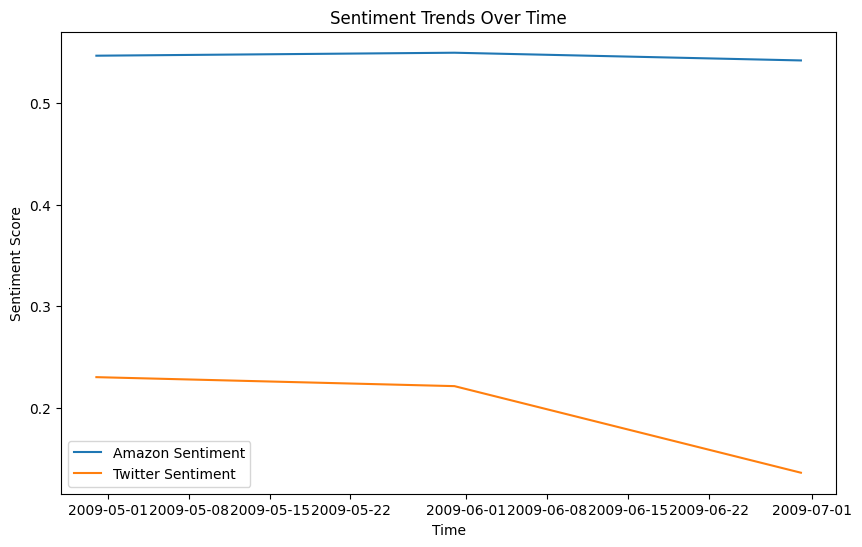

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_data['review_date'], merged_data['sentiment_score_amazon'], label='Amazon Sentiment')
plt.plot(merged_data['date'], merged_data['sentiment_score_twitter'], label='Twitter Sentiment')
plt.legend()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()


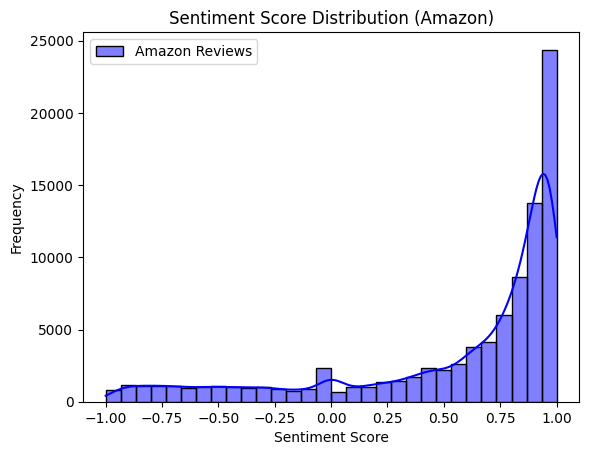

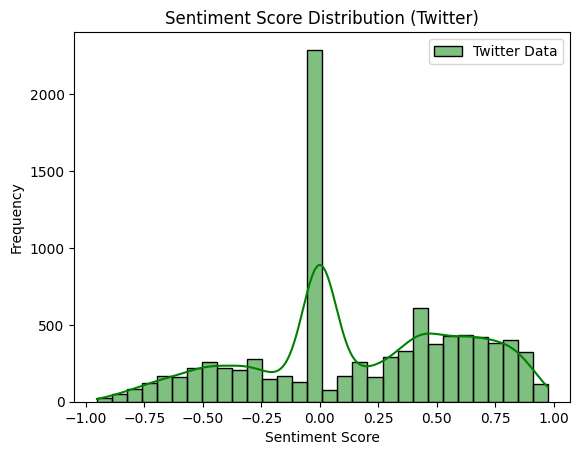

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment score distribution for Amazon reviews
sns.histplot(amazon_2009['sentiment_score'], kde=True, bins=30, color='blue', label='Amazon Reviews')
plt.title('Sentiment Score Distribution (Amazon)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot sentiment score distribution for Twitter data
sns.histplot(twitter_filtered_df['sentiment_score'], kde=True, bins=30, color='green', label='Twitter Data')
plt.title('Sentiment Score Distribution (Twitter)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


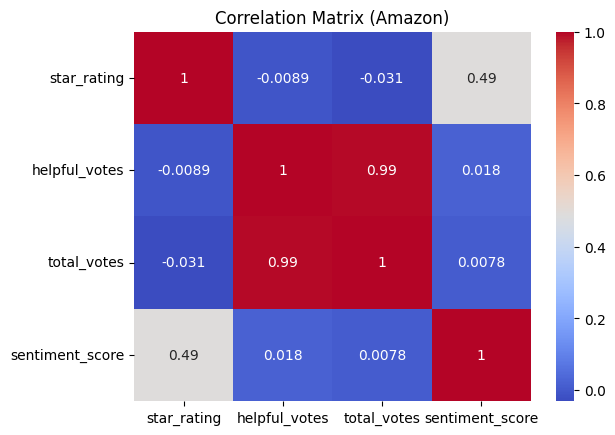

In [48]:
# Correlation heatmap for Amazon dataset
corr_amazon = amazon_2009[['star_rating', 'helpful_votes', 'total_votes', 'sentiment_score']].corr()
sns.heatmap(corr_amazon, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Amazon)')
plt.show()

# Correlation heatmap for Twitter dataset (if engagement metrics are available)
if 'likes' in twitter_df.columns and 'retweets' in twitter_df.columns:
    corr_twitter = twitter_filtered_df[['likes', 'retweets', 'sentiment_score']].corr()
    sns.heatmap(corr_twitter, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix (Twitter)')
    plt.show()


In [49]:
keywords = ['price', 'battery', 'design']  # Example keywords

for keyword in keywords:
    amazon_keyword_sentiment = amazon_2009[amazon_2009['review_body'].str.contains(keyword, case=False, na=False)]['sentiment_score'].mean()
    twitter_keyword_sentiment = twitter_filtered_df[twitter_filtered_df['text'].str.contains(keyword, case=False, na=False)]['sentiment_score'].mean()
    print(f"Keyword: {keyword}")
    print(f"  Amazon Avg Sentiment: {amazon_keyword_sentiment}")
    print(f"  Twitter Avg Sentiment: {twitter_keyword_sentiment}")


Keyword: price
  Amazon Avg Sentiment: 0.7045531341943848
  Twitter Avg Sentiment: 0.09868510638297875
Keyword: battery
  Amazon Avg Sentiment: 0.5699043013899049
  Twitter Avg Sentiment: -0.1915941176470588
Keyword: design
  Amazon Avg Sentiment: 0.6442054277828888
  Twitter Avg Sentiment: 0.26533666666666667


In [50]:
def analyze_company_sentiment(company_name, amazon_df, twitter_df):
    """
    Analyze sentiments and trends for a specific company across Amazon reviews and Twitter data.

    Parameters:
    - company_name (str): The name of the company to filter (e.g., "Apple").
    - amazon_df (DataFrame): Amazon reviews dataset.
    - twitter_df (DataFrame): Twitter dataset.

    Returns:
    - None: Displays visualizations and prints insights.
    """
    
    # Filter Amazon dataset for the company
    amazon_filtered = amazon_df[amazon_df['product_title'].str.contains(company_name, case=False, na=False)]
    
    # Filter Twitter dataset for the company
    twitter_filtered = twitter_df[twitter_df['text'].str.contains(company_name, case=False, na=False)]
    
    if amazon_filtered.empty or twitter_filtered.empty:
        print(f"No data found for {company_name} in one or both datasets.")
        return
    
    # Group Amazon data by month
    amazon_monthly = amazon_filtered.groupby(
        pd.Grouper(key='review_date', freq='M')
    )['sentiment_score'].mean().reset_index()
    
    # Group Twitter data by month
    twitter_monthly = twitter_filtered.groupby(
        pd.Grouper(key='date', freq='M')
    )['sentiment_score'].mean().reset_index()
    
    # Plot sentiment trends over time
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=amazon_monthly, x='review_date', y='sentiment_score', label='Amazon Sentiment', color='blue')
    sns.lineplot(data=twitter_monthly, x='date', y='sentiment_score', label='Twitter Sentiment', color='green')
    
    plt.title(f'Sentiment Trends for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Average Sentiment Score')
    plt.legend()
    plt.show()
    
    # Sentiment distribution comparison
    plt.figure(figsize=(12, 6))
    
    sns.histplot(amazon_filtered['sentiment_score'], kde=True, bins=30, color='blue', label='Amazon Sentiment')
    sns.histplot(twitter_filtered['sentiment_score'], kde=True, bins=30, color='green', label='Twitter Sentiment')
    
    plt.title(f'Sentiment Distribution for {company_name}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Print basic statistics
    print(f"Amazon Sentiments for {company_name}:")
    print(amazon_filtered['sentiment_score'].describe())
    
    print(f"\nTwitter Sentiments for {company_name}:")
    print(twitter_filtered['sentiment_score'].describe())


In [21]:
def filter_amazon_by_months(amazon_df, months):
    """
    Filters the Amazon dataset to include only rows where the review date is in the specified months.

    Parameters:
    - amazon_df (DataFrame): The Amazon reviews dataset.
    - months (list): List of month numbers (e.g., [5, 6, 7] for May, June, July).

    Returns:
    - DataFrame: Filtered Amazon dataset.
    """
    # Ensure the review_date column is in datetime format
    amazon_df['review_date'] = pd.to_datetime(amazon_df['review_date'], errors='coerce')
    
    # Filter rows where the month of the review date is in the specified months
    filtered_amazon = amazon_df[amazon_df['review_date'].dt.month.isin(months)]
    
    return filtered_amazon

# Example usage
months_to_filter = [4,5,6]  # May, June, July
filtered_amazon_df = filter_amazon_by_months(amazon_2009, months_to_filter)

# Display the filtered data
print(filtered_amazon_df.head())


        marketplace  customer_id       review_id  product_id  product_parent  \
2821779          US     31229092  R3KMMZWJY7A07X  B0014II9F0       992274286   
2821780          US     15139893  R118E4A1QDIY04  B00067OF80        12310937   
2821781          US     13858174   RXGYF0C4KQH5E  B001D20KUE       344498635   
2821782          US     17907300  R3LPHOSZEOD16Y  B000GIT002        89480199   
2821783          US     50929735  R18WX36A2QWJHN  B0012YFY54       906275872   

                                             product_title product_category  \
2821779  Panasonic RP-HC55-S Noise-Cancelling Earbud He...      Electronics   
2821780  Sennheiser EH-150 Dynamic Sound Evolution Hi-F...      Electronics   
2821781              Creative Zen Mozaic Series MP3 Player      Electronics   
2821782  Eagle Aspen EASDTV2BUHF Directv Approved 2-Bay...      Electronics   
2821783        Sangean Digital Rechargeable Portable Radio      Electronics   

         star_rating  helpful_votes  total_v

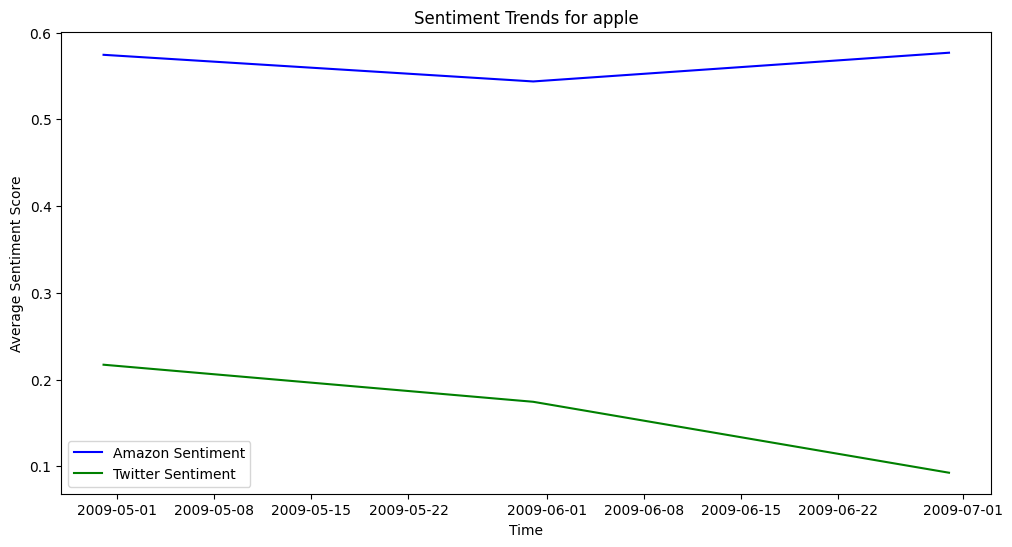

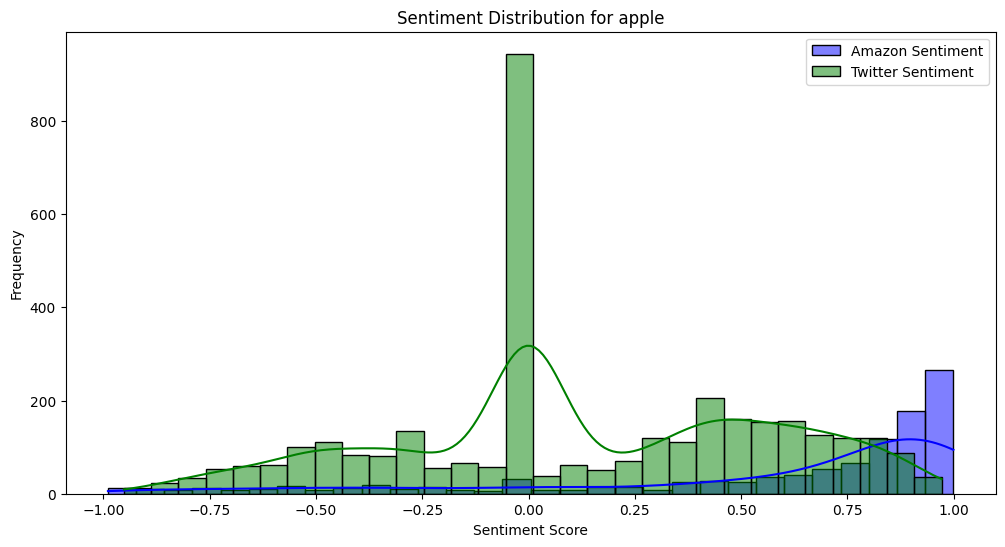

Amazon Sentiments for apple:
count    1079.000000
mean        0.564876
std         0.524937
min        -0.989300
25%         0.406850
50%         0.812600
75%         0.931100
max         0.999300
Name: sentiment_score, dtype: float64

Twitter Sentiments for apple:
count    3495.000000
mean        0.124339
std         0.441118
min        -0.951700
25%        -0.108700
50%         0.000000
75%         0.492600
max         0.971600
Name: sentiment_score, dtype: float64


In [51]:
# Example usage
analyze_company_sentiment("apple", filtered_amazon_df, twitter_filtered_df)


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_sentiment_trends(company_name, amazon_df, twitter_df):
    """
    Analyze sentiment trends for a specific company across Amazon reviews and Twitter data.

    Parameters:
    - company_name (str): The name of the company to filter (e.g., "Apple").
    - amazon_df (DataFrame): The Amazon reviews dataset.
    - twitter_df (DataFrame): The Twitter dataset.

    Returns:
    - None: Displays visualizations and prints insights.
    """
    
    # Filter Amazon dataset for the company
    amazon_filtered = amazon_df[amazon_df['product_title'].str.contains(company_name, case=False, na=False)]
    
    # Filter Twitter dataset for the company
    twitter_filtered = twitter_df[twitter_df['text'].str.contains(company_name, case=False, na=False)]
    
    if amazon_filtered.empty or twitter_filtered.empty:
        print(f"No data found for {company_name} in one or both datasets.")
        return
    
    # Group Amazon data by month
    amazon_monthly = amazon_filtered.groupby(
        pd.Grouper(key='review_date', freq='ME')
    )['sentiment_score'].mean().reset_index()
    
    # Group Twitter data by month
    twitter_monthly = twitter_filtered.groupby(
        pd.Grouper(key='date', freq='ME')
    )['sentiment_score'].mean().reset_index()
    
    # Normalize sentiment scores to make trends comparable
    amazon_monthly['normalized_sentiment'] = (amazon_monthly['sentiment_score'] - amazon_monthly['sentiment_score'].mean()) / amazon_monthly['sentiment_score'].std()
    twitter_monthly['normalized_sentiment'] = (twitter_monthly['sentiment_score'] - twitter_monthly['sentiment_score'].mean()) / twitter_monthly['sentiment_score'].std()
    
    # Plot normalized sentiment trends over time
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=amazon_monthly, x='review_date', y='normalized_sentiment', label='Amazon Sentiment (Normalized)', color='blue')
    sns.lineplot(data=twitter_monthly, x='date', y='normalized_sentiment', label='Twitter Sentiment (Normalized)', color='green')
    
    plt.title(f'Sentiment Trends for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Sentiment Score')
    plt.legend()
    plt.show()
    
    # Print basic statistics for each platform
    print(f"Amazon Sentiments for {company_name}:")
    print(amazon_filtered['sentiment_score'].describe())
    
    print(f"\nTwitter Sentiments for {company_name}:")
    print(twitter_filtered['sentiment_score'].describe())


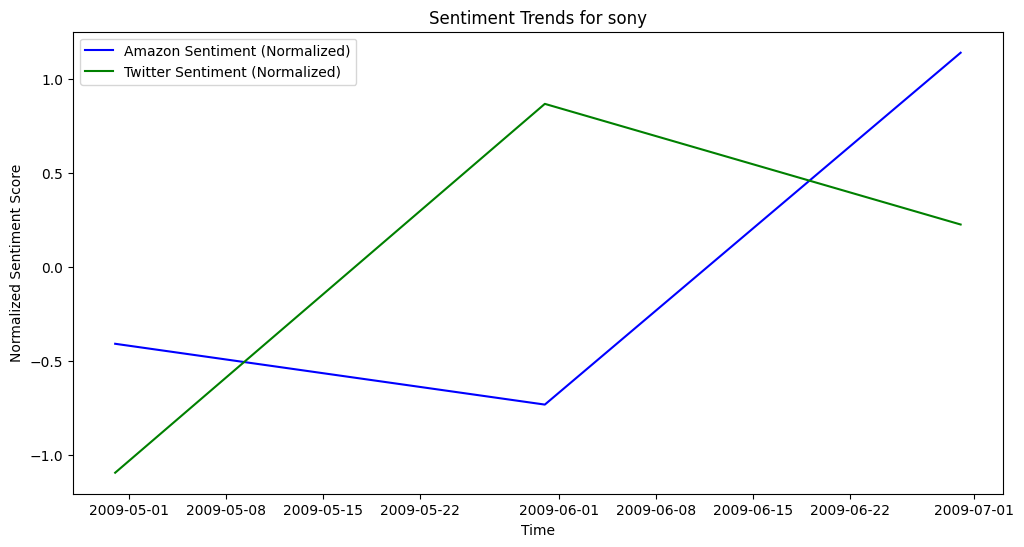

Amazon Sentiments for sony:
count    1794.000000
mean        0.565018
std         0.543571
min        -0.998400
25%         0.401900
50%         0.831600
75%         0.942175
max         0.999600
Name: sentiment_score, dtype: float64

Twitter Sentiments for sony:
count    459.000000
mean       0.106952
std        0.455723
min       -0.897900
25%       -0.175900
50%        0.000000
75%        0.492600
max        0.951400
Name: sentiment_score, dtype: float64


In [53]:
analyze_sentiment_trends("sony", filtered_amazon_df, twitter_filtered_df)

In [ ]:
!pip install ipywidgets


In [ ]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


In [54]:
# Common companies to look for
import re
companies = ['Apple', 'Samsung', 'Sony', 'LG', 'Microsoft']


def clean_title(title):
    # Convert to string and clean special characters, keeping spaces
    if pd.isna(title):
        return ''
    return re.sub(r'[^a-zA-Z\s]', '', str(title))

def get_company(title):
    # Clean the title first
    clean = clean_title(title)
    companies = ['Apple', 'Samsung', 'Sony', 'LG', 'Microsoft']
    
    for company in companies:
        if company.lower() in clean.lower():
            return company
    return 'Other'

In [55]:
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display, clear_output
import re

# Define the clean_title function
def clean_title(title):
    # Convert to string and clean special characters, keeping spaces
    if pd.isna(title):
        return ''
    return re.sub(r'[^a-zA-Z\s]', '', str(title))

# Define the get_company function
def get_company(title):
    # Clean the title first
    clean = clean_title(title)
    companies = ['Apple', 'Samsung', 'Sony', 'LG', 'Microsoft', 'Amazon']
    
    for company in companies:
        if company.lower() in clean.lower():
            return company
    return 'Other'

# Function to generate and display a word cloud with error handling
def generate_wordcloud(data, title):
    if data.empty or data.str.strip().str.len().sum() == 0:  # Check if data has any valid text
        print(f"Insufficient data to generate a word cloud for {title}.")
        return
    
    text = ' '.join(data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Function to handle company selection and update the word cloud
def analyze_sentiment_trends(company_name, amazon_df, twitter_df):
    """
    Analyze sentiment trends for a specific company across Amazon reviews and Twitter data.

    Parameters:
    - company_name (str): The name of the company to filter (e.g., "Apple").
    - amazon_df (DataFrame): The Amazon reviews dataset.
    - twitter_df (DataFrame): The Twitter dataset.

    Returns:
    - None: Displays visualizations and prints insights.
    """
    
    # Filter Amazon dataset for the company
    amazon_filtered = amazon_df[amazon_df['product_title'].str.contains(company_name, case=False, na=False)]
    
    # Filter Twitter dataset for the company
    twitter_filtered = twitter_df[twitter_df['text'].str.contains(company_name, case=False, na=False)]
    
    if amazon_filtered.empty or twitter_filtered.empty:
        print(f"No data found for {company_name} in one or both datasets.")
        return
    
    # Group Amazon data by month
    amazon_monthly = amazon_filtered.groupby(
        pd.Grouper(key='review_date', freq='ME')
    )['sentiment_score'].mean().reset_index()
    
    # Group Twitter data by month
    twitter_monthly = twitter_filtered.groupby(
        pd.Grouper(key='date', freq='ME')
    )['sentiment_score'].mean().reset_index()
    
    # Normalize sentiment scores to make trends comparable
    amazon_monthly['normalized_sentiment'] = (amazon_monthly['sentiment_score'] - amazon_monthly['sentiment_score'].mean()) / amazon_monthly['sentiment_score'].std()
    twitter_monthly['normalized_sentiment'] = (twitter_monthly['sentiment_score'] - twitter_monthly['sentiment_score'].mean()) / twitter_monthly['sentiment_score'].std()
    
    # Plot normalized sentiment trends over time
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=amazon_monthly, x='review_date', y='normalized_sentiment', label='Amazon Sentiment (Normalized)', color='blue')
    sns.lineplot(data=twitter_monthly, x='date', y='normalized_sentiment', label='Twitter Sentiment (Normalized)', color='green')
    
    plt.title(f'Sentiment Trends for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Sentiment Score')
    plt.legend()
    plt.show()
    
    # Print basic statistics for each platform
    print(f"Amazon Sentiments for {company_name}:")
    print(amazon_filtered['sentiment_score'].describe())
    
    print(f"\nTwitter Sentiments for {company_name}:")
    print(twitter_filtered['sentiment_score'].describe())

    amazon_reviews = amazon_df[amazon_df['company'] == company_name]['review_body']
    
    # Filter Twitter data for the selected company
    twitter_data = twitter_df[twitter_df['company'] == company_name]['text']
    print(f"Word Cloud for {company_name} (Amazon Reviews):")
    generate_wordcloud(amazon_reviews, f'Word Cloud ({company_name} Amazon Reviews)')
    
    print(f"Word Cloud for {company_name} (Twitter Data):")
    generate_wordcloud(twitter_data, f'Word Cloud ({company_name} Twitter Data)')

# Dropdown widget creation
def create_company_dropdown(filtered_amazon_df, twitter_filtered_df):
    companies = ['Apple', 'Samsung', 'Sony', 'LG', 'Microsoft','Amazon', 'Other']
    
    output = widgets.Output()
    
    def on_company_select(change):
        with output:
            clear_output(wait=True)
            analyze_sentiment_trends(change.new, filtered_amazon_df, twitter_filtered_df)
    
    company_dropdown = widgets.Dropdown(
        options=companies,
        value=companies[0],  # Set default value
        description='Company:',
        style={'description_width': 'initial'}
    )
    
    company_dropdown.observe(on_company_select, names='value')
    
    # Display both the dropdown and output area
    display(company_dropdown, output)
    
    # Initial plot
    with output:
        analyze_sentiment_trends(companies[0], filtered_amazon_df, twitter_filtered_df)

# Example usage: Add a "company" column to the DataFrames based on titles or texts
filtered_amazon_df['company'] = filtered_amazon_df['review_body'].apply(get_company)
twitter_filtered_df['company'] = twitter_filtered_df['text'].apply(get_company)

# Create dropdown and display word clouds dynamically
create_company_dropdown(filtered_amazon_df, twitter_filtered_df)


Dropdown(description='Company:', options=('Apple', 'Samsung', 'Sony', 'LG', 'Microsoft', 'Amazon', 'Other'), s…

Output()

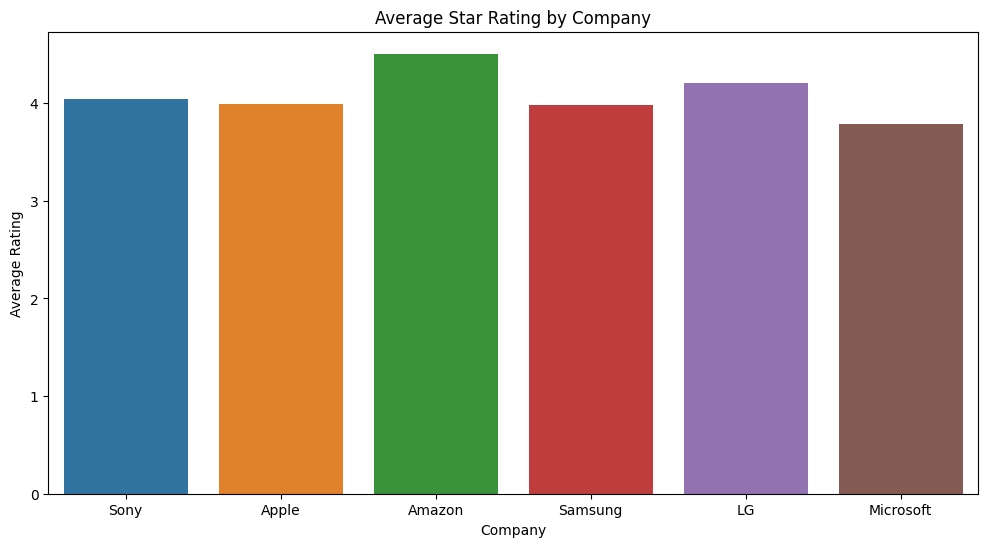


Company Statistics:
     company star_rating        
                    mean   count
6       Sony    4.044144  184533
1      Apple    3.992727   95425
0     Amazon    4.505141   66528
5    Samsung    3.984274   58501
2         LG    4.209327   13295
3  Microsoft    3.781141    2874


In [56]:
# Show trends for ratings based on the company from the whole amazon dataset
# Extract company names from product titles and create rating analysis

# Apply the modified function
df['company'] = df['product_title'].apply(get_company)


# Calculate average ratings and count per company
company_stats = df.groupby('company').agg({
    'star_rating': ['mean', 'count']
}).reset_index()

# Sort by review count to get most reviewed companies
company_stats = company_stats.sort_values(('star_rating', 'count'), ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=company_stats[company_stats['company'] != 'Other'], 
            x='company', 
            y=('star_rating', 'mean'))
plt.title('Average Star Rating by Company')
plt.ylabel('Average Rating')
plt.xlabel('Company')
plt.show()

# Print detailed statistics
print("\nCompany Statistics:")
print(company_stats[company_stats['company'] != 'Other'])


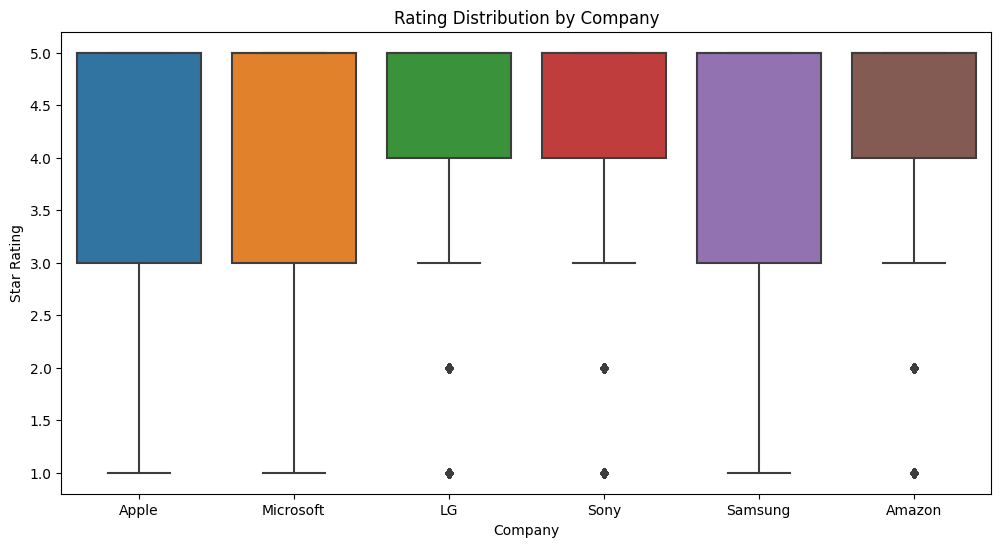

In [57]:
# Create rating distribution plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['company'] != 'Other'], 
            x='company', 
            y='star_rating')
plt.title('Rating Distribution by Company')
plt.ylabel('Star Rating')
plt.xlabel('Company')
plt.show()


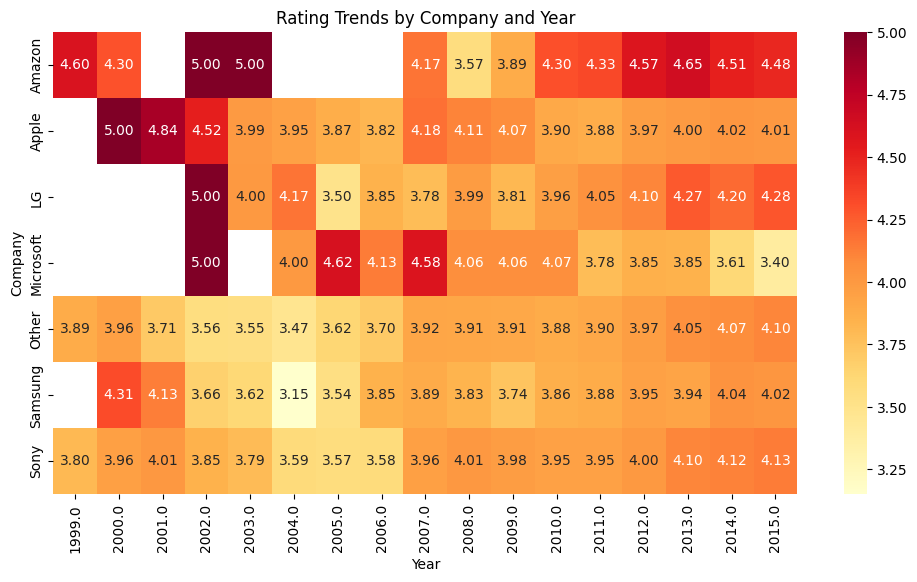

In [61]:
# Time-based trend analysis

plt.figure(figsize=(12, 6))
pivot_data = df.pivot_table(values='star_rating', 
                           index='company', 
                           columns='year', 
                           aggfunc='mean')
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Rating Trends by Company and Year')
plt.xlabel('Year')
plt.ylabel('Company')
plt.show()


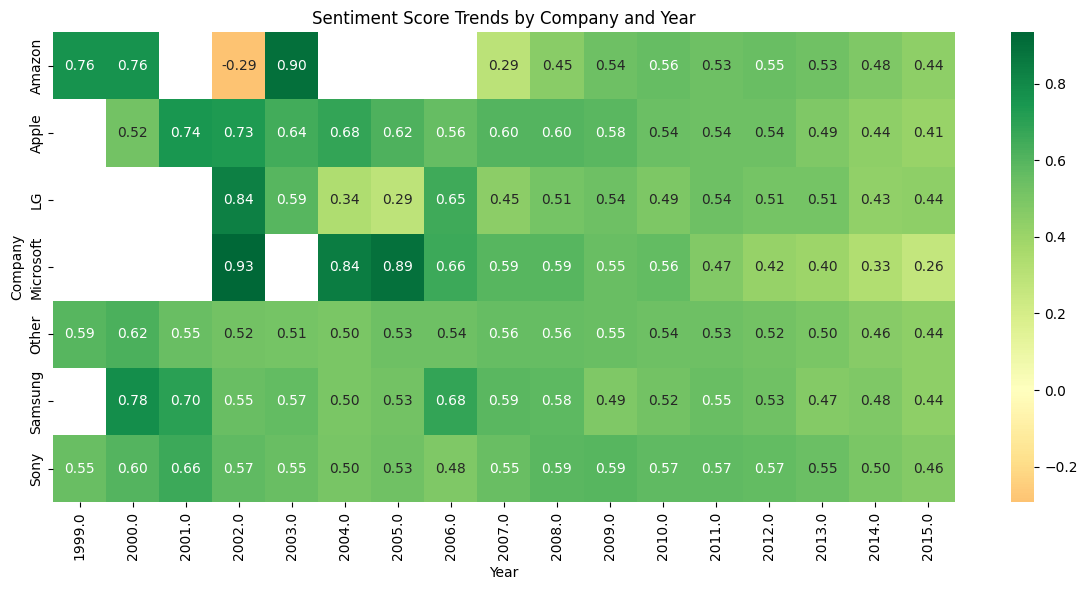


Overall Average Sentiment Scores by Company:
company
Sony         0.525234
Apple        0.501431
Other        0.482225
Amazon       0.481971
Samsung      0.478177
LG           0.463300
Microsoft    0.407583
Name: sentiment_score, dtype: float64


In [62]:
# Show trends for sentiments based on the company from the whole amazon dataset
# Create pivot table for sentiment scores
sentiment_pivot = df.pivot_table(values='sentiment_score', 
                               index='company', 
                               columns='year', 
                               aggfunc='mean')

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_pivot, 
            cmap='RdYlGn',  # Red-Yellow-Green colormap (Red for negative, Green for positive)
            center=0,       # Center the colormap at 0
            annot=True,     # Show values
            fmt='.2f')      # Format to 2 decimal places

plt.title('Sentiment Score Trends by Company and Year')
plt.xlabel('Year')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Print average sentiment scores per company
print("\nOverall Average Sentiment Scores by Company:")
print(df.groupby('company')['sentiment_score'].mean().sort_values(ascending=False))

In [ ]:
!pip install plotly


In [68]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Set default renderer for Kaggle notebooks
pio.renderers.default = 'iframe'

def predict_company_ratings_interactive(df, company_name, prediction_months):
    """
    Predict ratings for a company for specified number of months with all data displayed on one plot.
    """
    
    def prepare_time_series(df, company_name):
        df['yearmonth'] = df['review_date'].dt.to_period('M')
        monthly_data = df[df['company'] == company_name].groupby('yearmonth')['star_rating'].mean()
        monthly_data.index = monthly_data.index.to_timestamp('M')
        return monthly_data
    
    def evaluate_predictions(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        mae = np.mean(np.abs(y_true - y_pred))
        return {
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae
        }
    
    # Prepare time series data
    ts_data = prepare_time_series(df, company_name)
    
    # Split data
    train_size = len(ts_data) - prediction_months
    train_data = ts_data[:train_size]
    validation_data = ts_data[train_size:]
    
    # Fit model
    model = ExponentialSmoothing(train_data,
                                seasonal_periods=12,
                                trend='add',
                                seasonal='add')
    fitted_model = model.fit()
    
    # Make predictions
    validation_predictions = fitted_model.forecast(prediction_months)
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Actual': validation_data.values,
        'Predicted': validation_predictions.values
    }, index=validation_data.index)
    
    # Add Absolute Error and Percentage Error columns
    comparison_df['Absolute Error'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])
    comparison_df['Percentage Error'] = (comparison_df['Absolute Error'] / comparison_df['Actual']) * 100
    
    # Interactive Visualization Without Dropdowns
    fig = go.Figure()

    # Add training data trace
    fig.add_trace(go.Scatter(
        x=train_data.index,
        y=train_data,
        mode='lines',
        name='Training Data'
    ))

    # Add actual validation data trace
    fig.add_trace(go.Scatter(
        x=validation_data.index,
        y=validation_data,
        mode='lines+markers',
        name=f'Actual Values (Last {prediction_months} Months)'
    ))

    # Add predicted data trace
    fig.add_trace(go.Scatter(
        x=validation_data.index,
        y=validation_predictions,
        mode='lines+markers',
        name='Predictions'
    ))

    # Update layout to display all traces together
    fig.update_layout(
        title=f"{company_name} Rating Predictions vs Actual Values",
        xaxis_title="Date",
        yaxis_title="Average Rating",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        hovermode="x unified"
    )

    fig.show()

    # Calculate metrics
    metrics = evaluate_predictions(validation_data.values, validation_predictions)

    # Print results
    print("\nModel Evaluation Metrics:")
    print(f"RMSE: {metrics['RMSE']:.3f}")
    print(f"MAE: {metrics['MAE']:.3f}")
    print(f"R2 Score: {metrics['R2']:.3f}")
    
    print("\nDetailed Comparison:")
    print(comparison_df)
    
    print(f"\nAverage Percentage Error: {comparison_df['Percentage Error'].mean():.2f}%")
    
    # Return results
    return {
        'metrics': metrics,
        'comparison': comparison_df,
        'predictions': validation_predictions,
        'model': fitted_model
    }


# Example usage:
# results = predict_company_ratings_interactive(df, 'Apple', 3)



In [69]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_prediction_interface(df):
    # Define companies and prediction month options
    companies = ["Sony", "Apple", "Microsoft","LG", "Amazon", "Samsung"]
    months_options = list(range(1, 13))  # Allow predictions from 1 to 12 months
    
    output = widgets.Output()
    
    def on_change(change):
        with output:
            clear_output(wait=True)
            company = company_dropdown.value
            months = months_dropdown.value
            predict_company_ratings_interactive(df, company, months)
    
    # Create company dropdown
    company_dropdown = widgets.Dropdown(
        options=companies,
        value=companies[0],
        description='Company:',
        style={'description_width': 'initial'}
    )
    
    # Create months dropdown
    months_dropdown = widgets.Dropdown(
        options=months_options,
        value=3,  # Default to 3 months
        description='Predict Months:',
        style={'description_width': 'initial'}
    )
    
    # Observe both dropdowns for changes
    company_dropdown.observe(on_change, names='value')
    months_dropdown.observe(on_change, names='value')
    
    # Create horizontal layout for dropdowns
    dropdown_box = widgets.HBox([company_dropdown, months_dropdown])
    
    # Display widgets and output area
    display(dropdown_box, output)
    
    # Initial prediction
    with output:
        predict_company_ratings_interactive(df, companies[0], 3)

# Usage
create_prediction_interface(df)


Output()